Load the relevant libraries:

In [127]:
import tensorflow as tf 
import numpy as np
from tensorflow.keras.layers import Dense

print("Tensor flow version:", tf.__version__)

Tensor flow version: 2.8.2


Set up a sequential model

In [128]:
model = tf.keras.models.Sequential()
input_length = 30
model_shape = [60, 60, 60, 60, 60, 60]

model.add(Dense( model_shape[1],  activation = "relu", input_shape = (input_length,)))

for l in model_shape[1:]:
  model.add(Dense(l, activation = "relu"))
  tf.keras.layers.Dropout(0),

model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_175 (Dense)           (None, 60)                1860      
                                                                 
 dense_176 (Dense)           (None, 60)                3660      
                                                                 
 dense_177 (Dense)           (None, 60)                3660      
                                                                 
 dense_178 (Dense)           (None, 60)                3660      
                                                                 
 dense_179 (Dense)           (None, 60)                3660      
                                                                 
 dense_180 (Dense)           (None, 60)                3660      
                                                                 
 dense_181 (Dense)           (None, 10)              

Define some functions to prepare the data:

In [129]:
def to_binary(n, digits):
  """For an integer returns its truncated binary representation with n digits as an array """
  n= int(n)
  result = np.zeros(digits)
  for i in range(digits):
    result[i] = n % 2
    n = n//2
  return result

def target_func(X): 
  """ Computes the last decimal digit of a number represented in binary""" 
  counter = 0
  for i in range(X.shape[-1]):
    counter = (2*counter + int(X[-1-i]))%10
  return np.array([counter], dtype= np.uint8)




Testing:

In [130]:
target_func(to_binary(9301231419, 50))


array([9], dtype=uint8)

Machine Learning : The loss function

In [131]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Generate single batch

In [159]:
batch_size = 200000

def get_batch(batch_size):
  x_list = np.random.randint(0, 2, (batch_size, input_length), dtype = np.uint8) % 2
  y_list = np.apply_along_axis(target_func, 1, x_list) 
  return (x_list, y_list)


Initialize model

In [158]:
#model.compile(optimizer='adam',
#              loss=loss_fn,
#              metrics=['accuracy'])

model.compile(loss="sparse_categorical_crossentropy",
  optimizer="sgd",
  metrics=["accuracy"])
#model.weights

Train

In [160]:
(x_train,y_train) = get_batch(batch_size)

In [161]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
6250/6250 [==============================] - 12s 2ms/step - loss: 1.6122 - accuracy: 0.2011
Epoch 2/10
6250/6250 [==============================] - 11s 2ms/step - loss: 1.6114 - accuracy: 0.2030
Epoch 3/10
6250/6250 [==============================] - 12s 2ms/step - loss: 1.6112 - accuracy: 0.2030
Epoch 4/10
6250/6250 [==============================] - 11s 2ms/step - loss: 1.6111 - accuracy: 0.2032
Epoch 5/10
6250/6250 [==============================] - 11s 2ms/step - loss: 1.6108 - accuracy: 0.2043
Epoch 6/10
6250/6250 [==============================] - 13s 2ms/step - loss: 1.6107 - accuracy: 0.2037
Epoch 7/10
6250/6250 [==============================] - 12s 2ms/step - loss: 1.6106 - accuracy: 0.2031
Epoch 8/10
6250/6250 [==============================] - 12s 2ms/step - loss: 1.6105 - accuracy: 0.2043
Epoch 9/10
6250/6250 [==============================] - 12s 2ms/step - loss: 1.6103 - accuracy: 0.2056
Epoch 10/10
6250/6250 [==============================] - 12s 2ms/step - l

View History

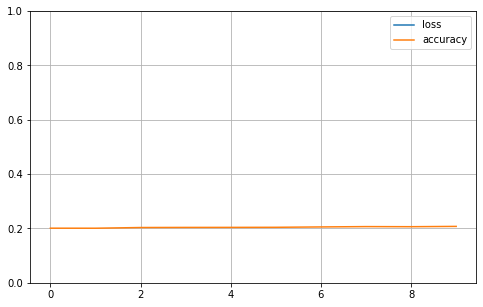

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [156]:
(x_test,y_test) = get_batch(10000)
model(x_test)
model.evaluate(x_test, y_test, verbose = 2)

313/313 - 0s - loss: 1.6148 - accuracy: 0.1993 - 393ms/epoch - 1ms/step


[1.6148300170898438, 0.19930000603199005]

In [138]:
print(np.apply_along_axis(target_func, 1, (x_test)))
model(x_test)

[[1]
 [6]
 [0]
 [4]
 [5]
 [7]
 [5]
 [8]
 [3]
 [0]
 [9]
 [6]
 [2]
 [8]
 [1]
 [0]
 [6]
 [9]
 [5]
 [5]
 [1]
 [1]
 [8]
 [9]
 [8]
 [0]
 [5]
 [0]
 [6]
 [4]
 [3]
 [0]
 [4]
 [7]
 [0]
 [7]
 [6]
 [2]
 [1]
 [9]
 [8]
 [2]
 [8]
 [8]
 [0]
 [7]
 [5]
 [3]
 [1]
 [5]
 [1]
 [0]
 [6]
 [2]
 [2]
 [6]
 [0]
 [8]
 [8]
 [1]
 [7]
 [3]
 [4]
 [5]
 [1]
 [7]
 [0]
 [5]
 [2]
 [0]
 [1]
 [8]
 [0]
 [6]
 [6]
 [7]
 [0]
 [9]
 [0]
 [3]
 [8]
 [5]
 [1]
 [8]
 [4]
 [9]
 [3]
 [6]
 [9]
 [2]
 [7]
 [8]
 [8]
 [7]
 [8]
 [3]
 [9]
 [2]
 [8]
 [6]
 [9]
 [0]
 [9]
 [5]
 [7]
 [7]
 [0]
 [4]
 [9]
 [0]
 [7]
 [9]
 [1]
 [0]
 [9]
 [4]
 [0]
 [2]
 [9]
 [5]
 [4]
 [6]
 [4]
 [8]
 [9]
 [4]
 [8]
 [6]
 [8]
 [1]
 [4]
 [9]
 [3]
 [4]
 [5]
 [2]
 [2]
 [8]
 [1]
 [0]
 [5]
 [2]
 [1]
 [6]
 [4]
 [8]
 [3]
 [9]
 [6]
 [2]
 [7]
 [4]
 [5]
 [2]
 [9]
 [4]
 [7]
 [1]
 [5]
 [2]
 [8]
 [0]
 [4]
 [0]
 [9]
 [1]
 [7]
 [9]
 [1]
 [8]
 [9]
 [0]
 [4]
 [5]
 [7]
 [4]
 [9]
 [8]
 [4]
 [3]
 [4]
 [8]
 [2]
 [3]
 [1]
 [1]
 [0]
 [6]
 [3]
 [7]
 [1]
 [6]
 [2]
 [1]
 [4]
 [8]
 [8]
 [5]
 [1]
 [2]


<tf.Tensor: shape=(1000, 10), dtype=float32, numpy=
array([[1.1355828e-29, 7.5120159e-04, 8.1620550e-16, ..., 9.9829024e-01,
        4.6244602e-20, 5.0785064e-07],
       [5.9533968e-14, 0.0000000e+00, 8.3799546e-07, ..., 5.0203332e-33,
        3.8685813e-10, 1.2096102e-32],
       [7.2803438e-01, 9.7526252e-31, 2.4684520e-01, ..., 1.4841751e-28,
        2.2733105e-02, 4.9864222e-30],
       ...,
       [3.1421312e-29, 9.9975544e-01, 4.8543204e-20, ..., 1.3734489e-04,
        1.5853832e-23, 1.9294913e-23],
       [7.8711766e-01, 1.8325814e-17, 2.4414931e-10, ..., 7.5654310e-21,
        7.4698399e-09, 9.7659315e-20],
       [7.6576968e-24, 1.4582615e-09, 3.5129367e-13, ..., 7.2004531e-09,
        3.0996070e-20, 9.9841702e-01]], dtype=float32)>